In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Data/train_1_post.csv',parse_dates=["date"])
test = pd.read_csv('Data/test2.csv', parse_dates=["date"])

In [3]:
# превратим дату в индекс и сделаем изменение постоянным
train.set_index('date', inplace = True)
test.set_index('date', inplace = True)

In [4]:
# рассчитаем скользящее среднее для трех месяцев
train.rolling(window = 7).mean()

,snow_height,degree_coverage,tmean,post_2,post_9387
date,,,,,
2008-01-01,NaN,NaN,NaN,NaN,NaN
2008-01-02,NaN,NaN,NaN,NaN,NaN
2008-01-03,NaN,NaN,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN,NaN,NaN
2008-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-27,45.428571,10.0,-29.371429,108.0,25.0
2017-12-28,45.428571,10.0,-30.128571,108.0,25.0
2017-12-29,45.571429,10.0,-29.242857,108.0,25.0


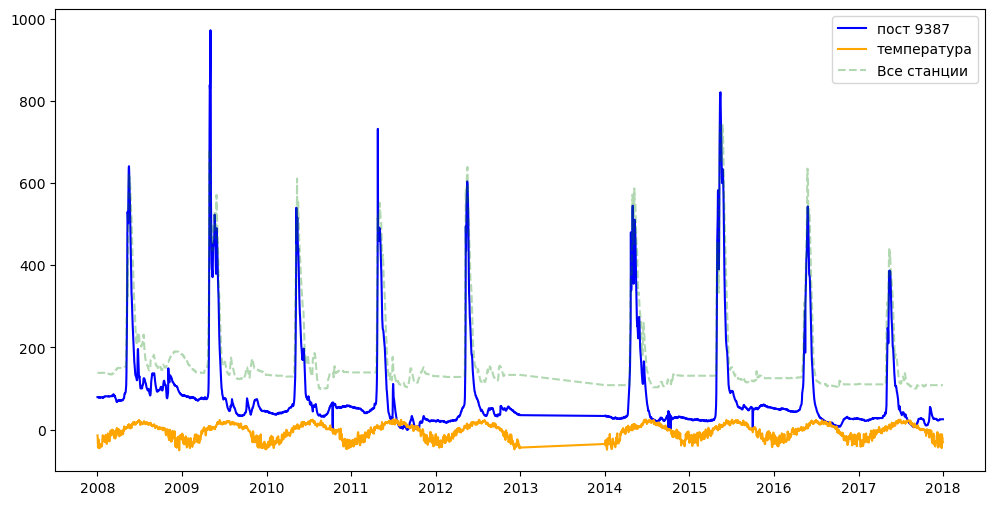

In [5]:
#train['post_9387'].plot()
# изменим размер графика, уберем легенду и добавим подписи
plt.figure(figsize = (12,6))
plt.plot(train['post_9387'], label = 'Уровень воды на посту 9387(Ванавар)  с 2008 по 2018 год', color = 'blue')
plt.plot(train['tmean'],color='orange')
#plt.plot(train[['post_1','post_2','post_4','post_5','post_6','post_7','post_8','post_9','post_10','post_11']], 'g--' , alpha=0.1)
plt.plot(train[['post_2']], 'g--' , alpha=0.3)

plt.legend(["пост 9387", "температура","Все станции"], loc ="upper right")  
#ax = train['post_9387'].plot(figsize = (12,6), legend = None)
#ax = train[['post_1','post_2']].plot(style= '--',alpha=0.5)
#ax.set(title = 'Уровень воды на посту 9387(Ванавар)  с 2008 по 2018 год', xlabel = 'годы', ylabel = 'Уровень воды')

plt.show()


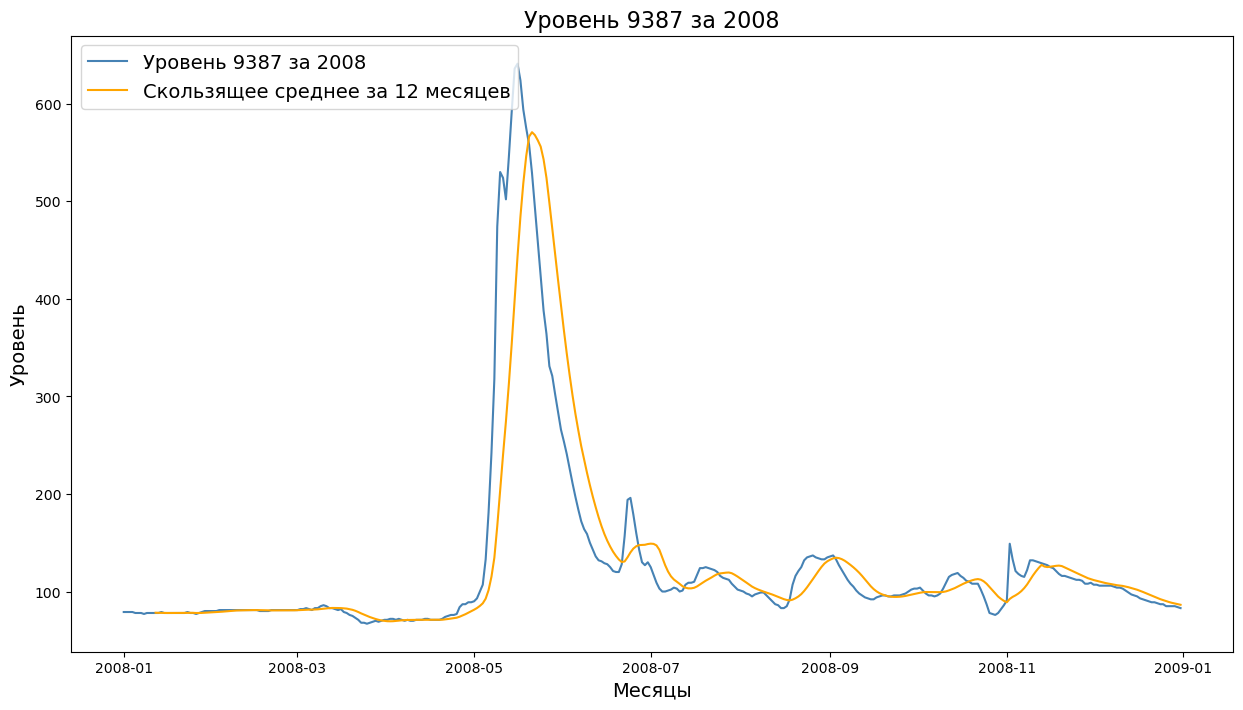

In [6]:
# зададим размер графика
plt.figure(figsize = (15,8))
temp2008 = train['2008-01-01':'2008-12-31']
    
# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(temp2008['post_9387'], label = 'Уровень 9387 за 2008', color = 'steelblue')
plt.plot(temp2008['post_9387'].rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Уровень', fontsize = 14)
plt.title('Уровень 9387 за 2008', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()


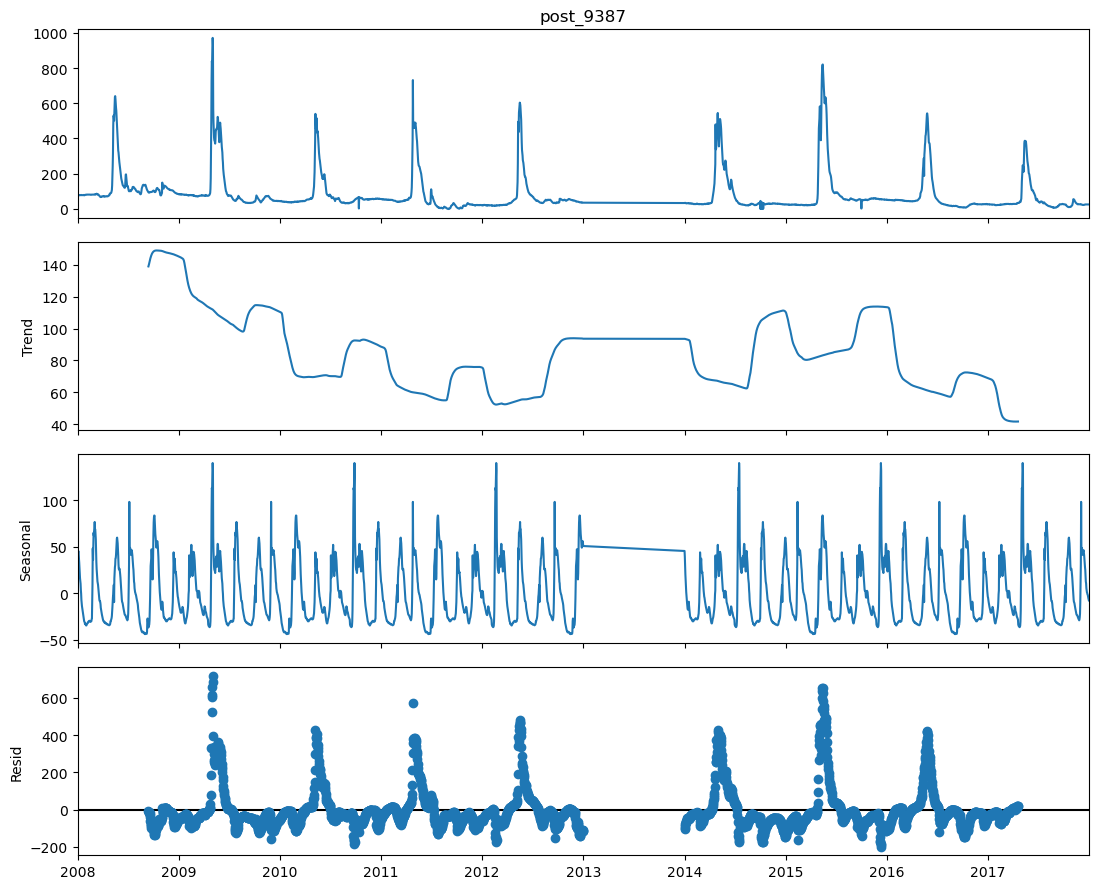

In [7]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
  
#применяем функцию к данным о перевозках
decompose = seasonal_decompose(train['post_9387'],period=512)
decompose.plot()
 
plt.show()

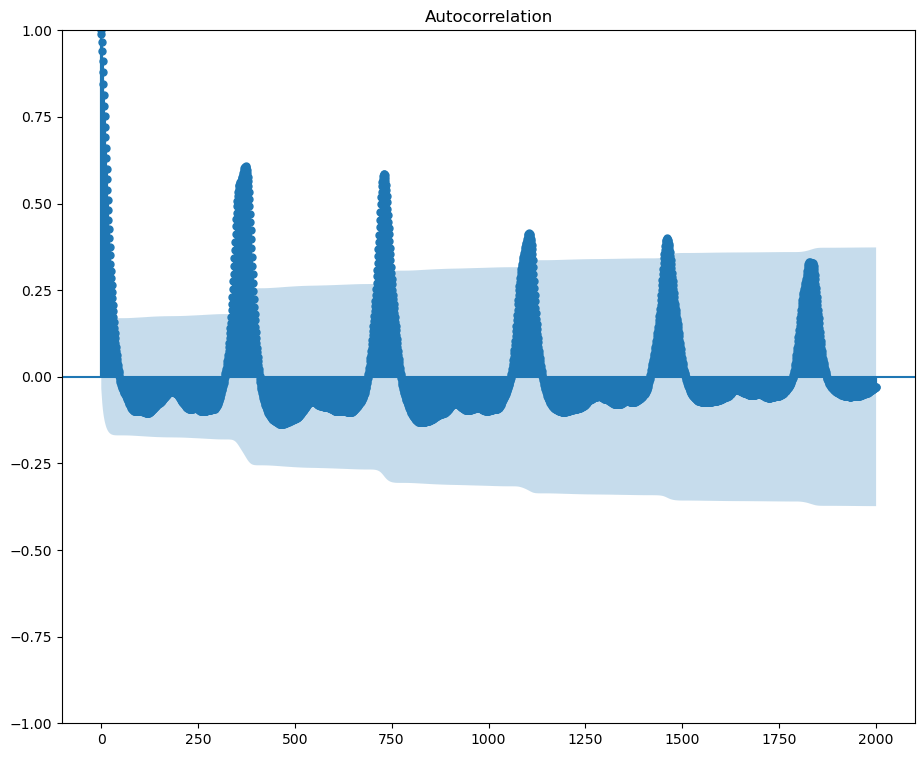

In [8]:
#Теперь построим график ACF для наших данных о перевозках.


# импортируем функцию для построения автокорреляционной функции (ACF)
from statsmodels.graphics.tsaplots import plot_acf
 
# применим ее к данным о пассажирах
#plot_acf(train['post_9387'])
plot_acf(train['post_9387'],lags=2000)
plt.show()

In [9]:
#temp2008 = train['2008-01-01':'2008-12-31']
test2018 = test['2018-01-01':'2018-12-31']


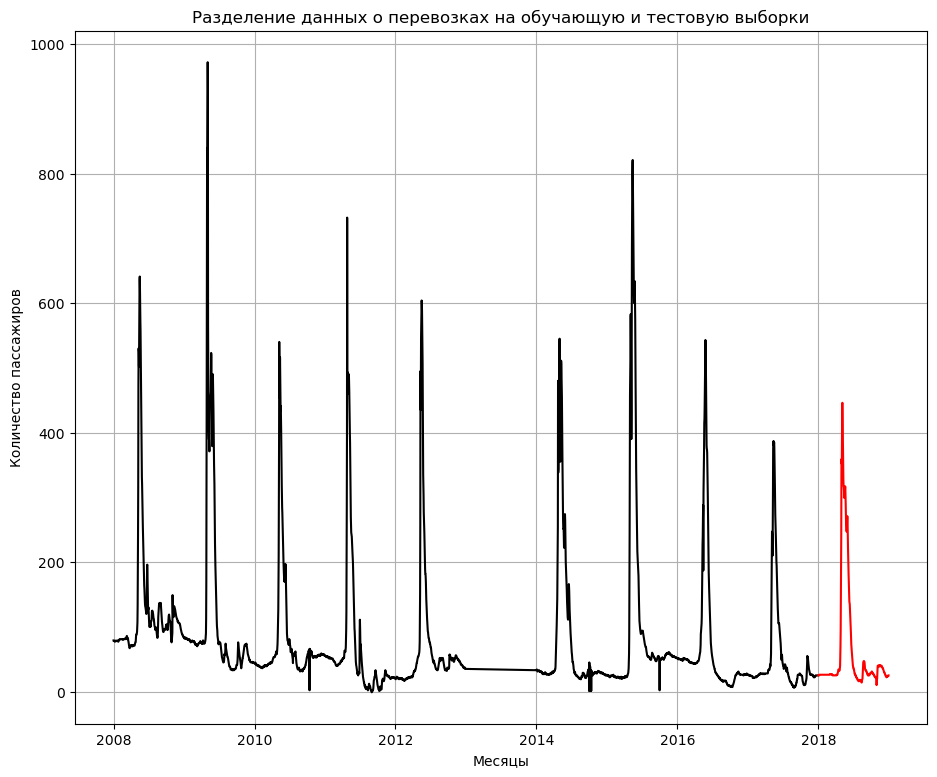

In [10]:
plt.plot(train['post_9387'], color = "black")
plt.plot(test2018['post_9387'], color = "red")
 
# заголовок и подписи к осям
plt.title('Разделение данных о перевозках на обучающую и тестовую выборки')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

In [80]:
# обучим модель с соответствующими параметрами, SARIMAX(3, 0, 0)x(0, 1, 0, 12)
# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

# создадим объект этой модели
model = SARIMAX(train['post_9387'], order = (3, 0, 0), seasonal_order = (0, 1, 0, 12))
 
# применим метод fit
result = model.fit()

C:\Users\Rhino\.conda\envs\Rhino\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rhino\.conda\envs\Rhino\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [81]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

# и закончится в конце тестового
end = start + len(test2018) - 1
print(start,end)
# применим метод predict
predictions = result.predict(17540, 17902)
predictions

3288 3652


C:\Users\Rhino\.conda\envs\Rhino\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Rhino\.conda\envs\Rhino\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


17540    24.822723
17541    24.843611
17542    24.862611
17543    24.879674
17544    24.744231
           ...    
17898    24.776518
17899    24.800183
17900    24.822723
17901    24.843611
17902    24.862611
Name: predicted_mean, Length: 363, dtype: float64

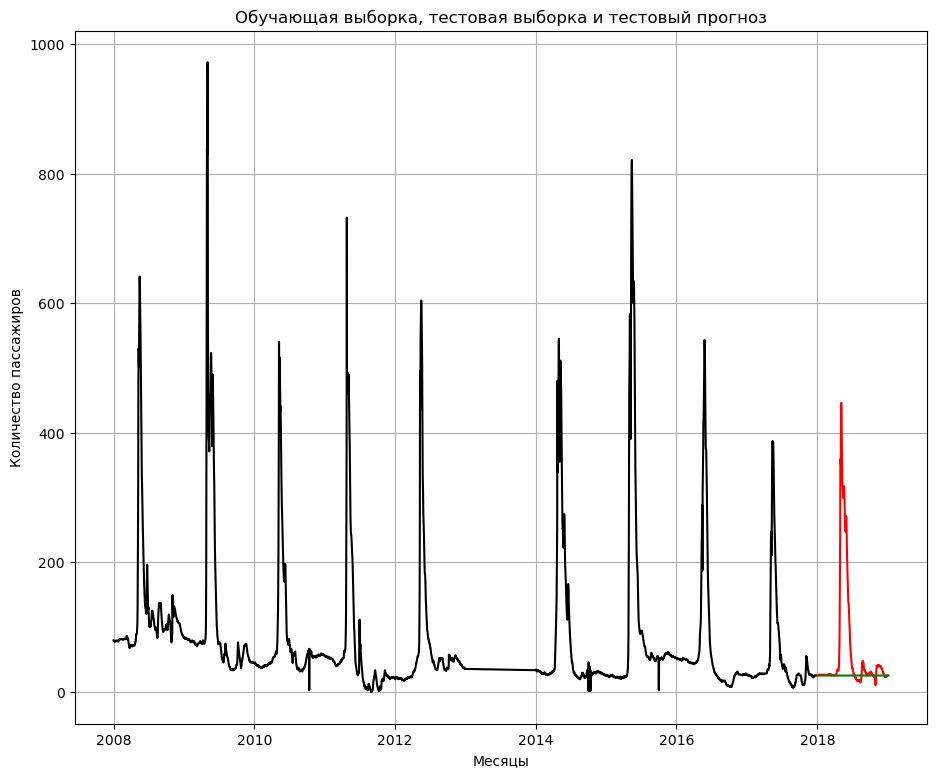

In [76]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train['post_9387'], color = "black")
plt.plot(test2018['post_9387'], color = "red")
plt.plot(predictions, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()


